In [1]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

ROOT = Path.cwd().parent
sys.path.append(ROOT.as_posix())

from src.data import MCSimData

sns.set_theme()

In [2]:
VBF_diphoton = MCSimData(ROOT / 'data' / 'VBF_diphoton.h5')
GGF_diphoton = MCSimData(ROOT / 'data' / 'GGF_diphoton.h5')

VBF_zz4l = MCSimData(ROOT / 'data' / 'VBF_zz4l.h5')
GGF_zz4l = MCSimData(ROOT / 'data' / 'GGF_zz4l.h5')

The `num_data` argument is retrieved from the number of data with $\mathcal{L} = 3000~\mathrm{fb}^{-1}$.

In [3]:
def numpy_to_pandas(jet_flavor: dict[str, np.ndarray], channel: str, num_data: int) -> pd.DataFrame:
    """Convert a dictionary of numpy arrays to a pandas DataFrame."""
    flavors = ['2q0g', '1q1g', '0q2g']
    df = pd.DataFrame({
        'Jet Flavor': flavors,
        'Count': [jet_flavor[flavor][:num_data].sum() for flavor in flavors]
    })
    df['hue'] = channel
    return df

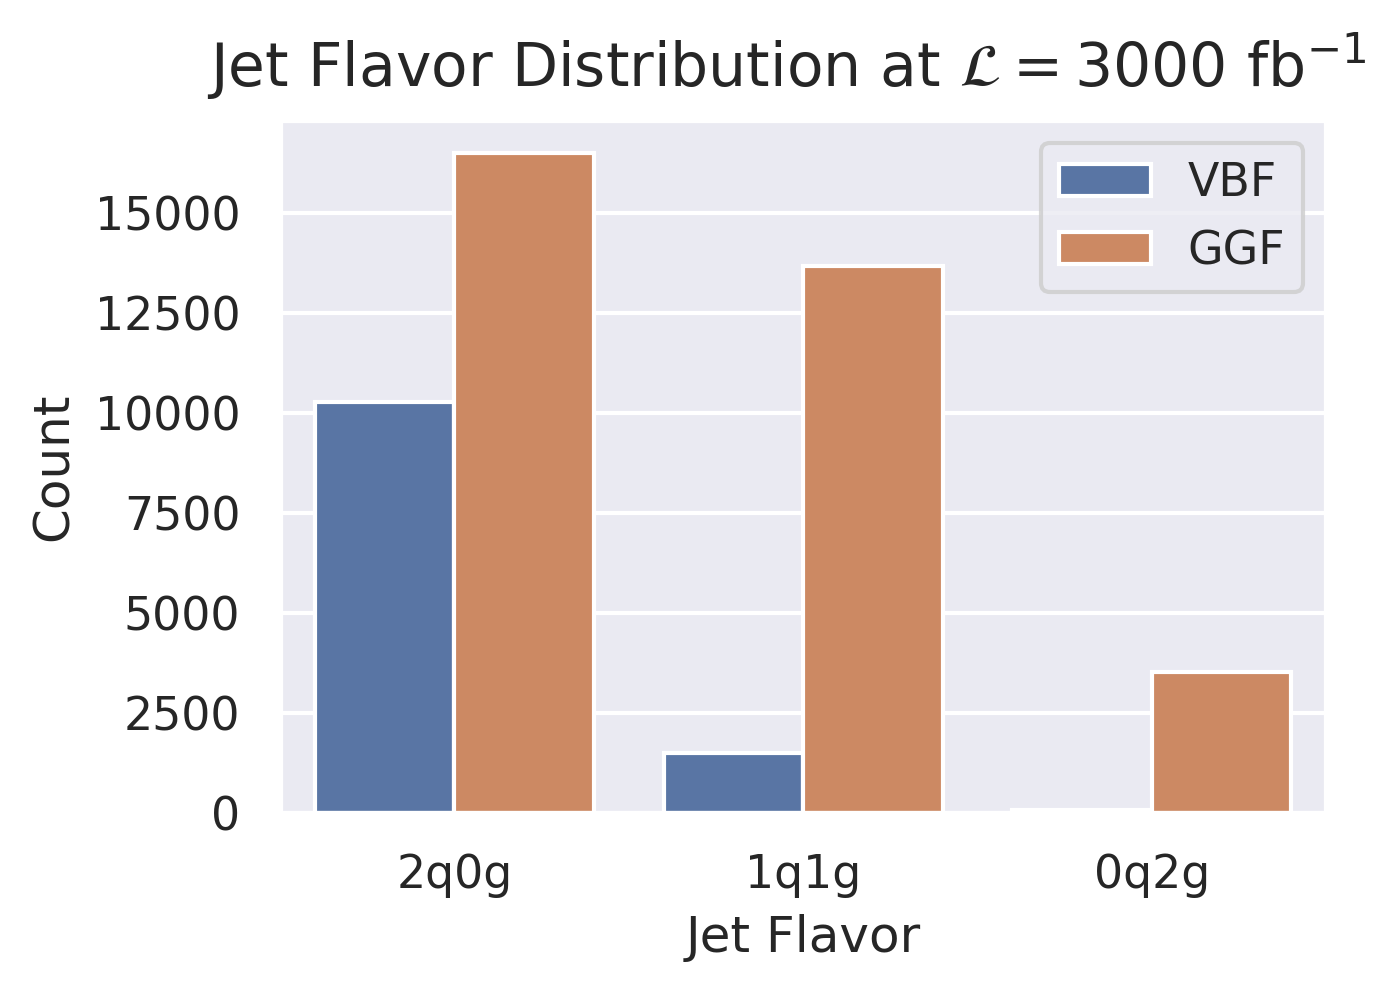

In [ ]:
VBF_df = numpy_to_pandas(VBF_diphoton.jet_flavor, 'VBF', num_data=11825)
GGF_df = numpy_to_pandas(GGF_diphoton.jet_flavor, 'GGF', num_data=33693)
df = pd.concat([VBF_df, GGF_df])

fig = plt.figure(figsize=(4.5,3), dpi=300)
sns.barplot(data=df, x="Jet Flavor", y="Count", hue="hue")
plt.suptitle('Jet Flavor Distribution at ' + r"$\mathcal{L} = 3000~\mathrm{fb}^{-1}$")
plt.legend()
plt.show()
fig.savefig(ROOT / 'figures' / 'jet-flavor_distribution.pdf', bbox_inches='tight')

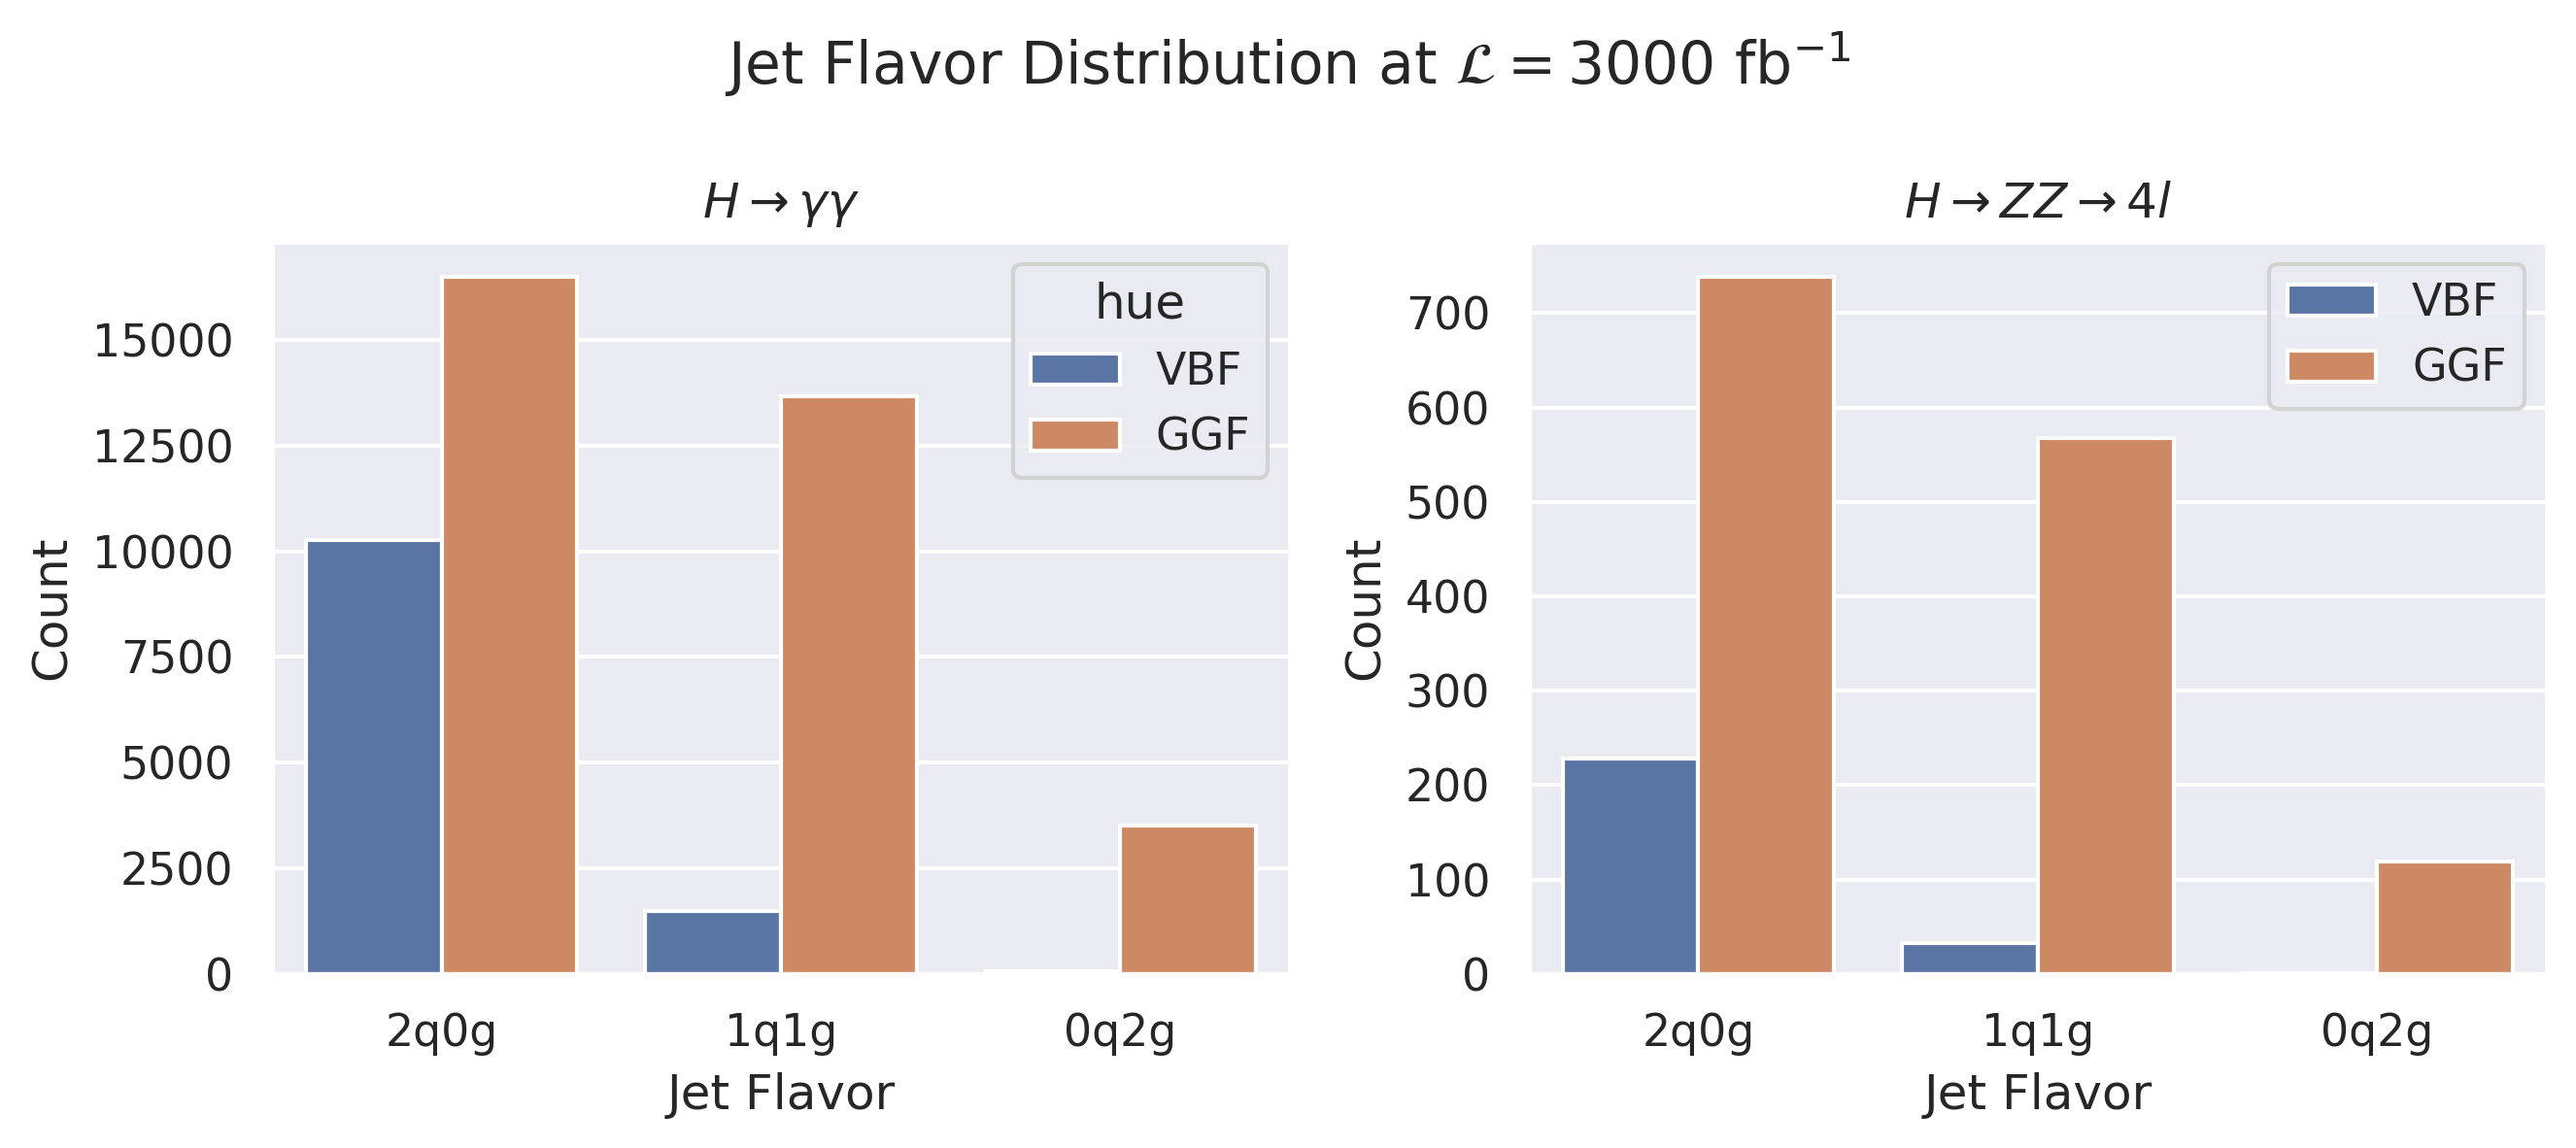

In [13]:
VBF_diphoton_df = numpy_to_pandas(VBF_diphoton.jet_flavor, 'VBF', num_data=11825)
GGF_diphoton_df = numpy_to_pandas(GGF_diphoton.jet_flavor, 'GGF', num_data=33693)
VBF_zz4l_df = numpy_to_pandas(VBF_zz4l.jet_flavor, 'VBF', num_data=262)
GGF_zz4l_df = numpy_to_pandas(GGF_zz4l.jet_flavor, 'GGF', num_data=1426)

fig, ax = plt.subplots(1, 2, figsize=(9,4), dpi=300)
sns.barplot(data=pd.concat([VBF_diphoton_df, GGF_diphoton_df]), x="Jet Flavor", y="Count", hue="hue", ax=ax[0])
sns.barplot(data=pd.concat([VBF_zz4l_df, GGF_zz4l_df]), x="Jet Flavor", y="Count", hue="hue", ax=ax[1])
plt.suptitle('Jet Flavor Distribution at ' + r"$\mathcal{L} = 3000~\mathrm{fb}^{-1}$")
ax[0].set_title(r"$H\to\gamma\gamma$")
ax[1].set_title(r"$H\to ZZ\to 4l$")
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig(ROOT / 'figures' / 'jet-flavor_distribution-full.pdf', bbox_inches='tight')